In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [70]:
path = "C:/Users/SENTS-IN/Desktop/Training/"
df_voice = pd.read_csv(path+"voice.csv")

In [71]:
df_voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [72]:
"""

1. We will use acoustic features to distinguish a male voice from female. Load the
dataset from “voice.csv”, identify the target variable and do a one-hot encoding
for the same. Split the dataset in train-test with 20% of the data kept aside for
testing.
[Hint: Refer to LabelEncoder documentation in scikit-learn]

"""

'\n\n1. We will use acoustic features to distinguish a male voice from female. Load the\ndataset from “voice.csv”, identify the target variable and do a one-hot encoding\nfor the same. Split the dataset in train-test with 20% of the data kept aside for\ntesting.\n[Hint: Refer to LabelEncoder documentation in scikit-learn]\n\n'

In [73]:
df_voice["label"] = df_voice["label"].map({"male":"0","female":"1"})

In [74]:
df_voice["label"].unique()

array(['0', '1'], dtype=object)

In [75]:
X = df_voices.iloc[:,0:20]

In [76]:
Y = df_voices["label"]

In [77]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,random_state=10,test_size=0.20)

In [78]:
"""
2. Fit a logistic regression model and measure the accuracy on the test set.
[Hint: Refer to Linear Models section in scikit-learn]
"""

'\n2. Fit a logistic regression model and measure the accuracy on the test set.\n[Hint: Refer to Linear Models section in scikit-learn]\n'

In [79]:
linear_mod=LogisticRegression()

In [80]:
linear_mod.fit(train_x,train_y)

C:\Users\SENTS-IN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
predict_value = linear_mod.predict(test_x)

In [82]:
metrics.accuracy_score(predict_value,test_y)

0.9274447949526814

In [83]:
"""
3. Compute the correlation matrix that describes the dependence between all
predictors and identify the predictors that are highly correlated. Plot the
correlation matrix using seaborn heatmap.
[Hint: Explore dataframe methods to identify appropriate method]

"""

'\n3. Compute the correlation matrix that describes the dependence between all\npredictors and identify the predictors that are highly correlated. Plot the\ncorrelation matrix using seaborn heatmap.\n[Hint: Explore dataframe methods to identify appropriate method]\n\n'

In [84]:
corr_val = df_voice.corr()

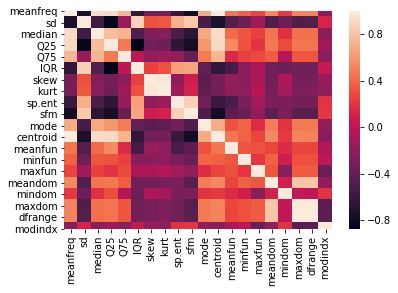

In [85]:
sns.heatmap(corr_val)
plt.show()

In [86]:
corr_val

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [87]:
"""
4. Based on correlation remove those predictors that are correlated and fit a
logistic regression model again and compare the accuracy with that of
previous model.
[Hint: Identify correlated variable pairs and remove one among them]
"""

'\n4. Based on correlation remove those predictors that are correlated and fit a\nlogistic regression model again and compare the accuracy with that of\nprevious model.\n[Hint: Identify correlated variable pairs and remove one among them]\n'

In [88]:
X = X.drop (["median","Q25","centroid"],axis=1)

In [89]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,random_state=10,test_size=0.20)

In [90]:
linear_mod=LogisticRegression()

In [91]:
linear_mod.fit(train_x,train_y)

C:\Users\SENTS-IN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
predict_value = linear_mod.predict(test_x)

In [93]:
metrics.accuracy_score(predict_value,test_y)

0.916403785488959